In [8]:
import os
import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate

import pandas as pd
font_size=25
lw=4
line_w=lw

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

from settings_and_potential_eddie import *

In [2]:
## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-10,10]
a=range_int[0]
b=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), a,b)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), a,b)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, a,b)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, a,b)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, a,b)[0],16)/norm


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


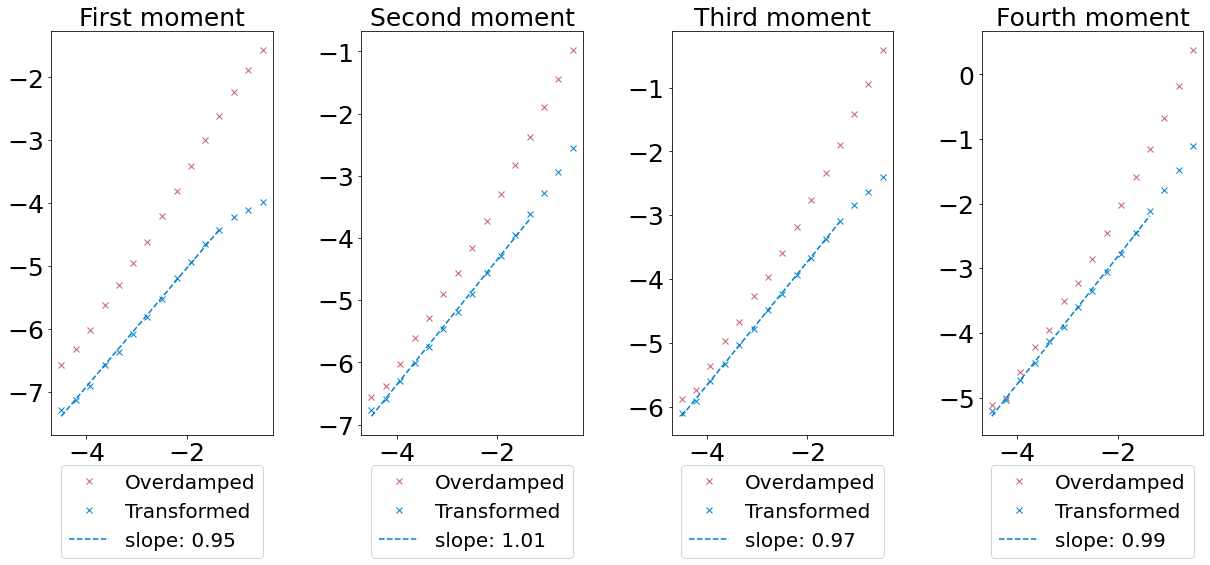

In [3]:
from settings_and_potential_eddie import *

# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)
lb=0
ub=-3 #len(dtlist)+1
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# ax1.set_title("First moment",fontsize=font_size,y=1.05)
# ax2.set_title("Second moment",fontsize=font_size,y=1.05)
# ax3.set_title("Third moment",fontsize=font_size,y=1.05)
# ax4.set_title("Fourth moment",fontsize=font_size,y=1.05)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile("data_a25/noada_moment1.txt"))
mom2_list=np.hstack(openCfile("data_a25/noada_moment2.txt"))
mom3_list=np.hstack(openCfile("data_a25/noada_moment3.txt"))
mom4_list=np.hstack(openCfile("data_a25/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.plot(xm,np.log(mom1_list),"x",color=myred,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myred,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myred,label=lab)
ax4.plot(xm,np.log(mom4_list),"x",color=myred,label=lab)

## interpolation linear  
# #first moment
# m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
# ax1.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
# #second moment
# m, c = np.linalg.lstsq(A, np.log(mom2_list)[lb:ub], rcond=None)[0]
# ax2.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
# #third moment
# m, c = np.linalg.lstsq(A, np.log(mom3_list)[lb:ub], rcond=None)[0]
# ax3.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
# #fourth moment
# m, c = np.linalg.lstsq(A, np.log(mom4_list)[lb:ub], rcond=None)[0]
# ax4.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)


## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile("data_a25/tr_moment1.txt"))
mom2_list=np.hstack(openCfile("data_a25/tr_moment2.txt"))
mom3_list=np.hstack(openCfile("data_a25/tr_moment3.txt"))
mom4_list=np.hstack(openCfile("data_a25/tr_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.plot(xm,np.log(mom1_list),"x",color=myblue,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myblue,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myblue,label=lab)
ax4.plot(xm,np.log(mom4_list),"x",color=myblue,label=lab)


## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
ax1.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax1.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list)[lb:ub], rcond=None)[0]
ax2.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list)[lb:ub], rcond=None)[0]
ax3.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax3.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

#fourth moment
m, c = np.linalg.lstsq(A, np.log(mom4_list)[lb:ub], rcond=None)[0]
ax4.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax4.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

## Add the first order line 
ax1.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
ax1.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)
ax2.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
ax2.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)
ax3.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
ax3.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)
ax4.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
ax4.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)

ax1.set_ylim([-8,-1]) #change to -7.5 for a=2.5
ax2.set_ylim([-8,-1])
ax3.set_ylim([-8,-1])
ax4.set_ylim([-8,-1])

ax1.set_xlim([5,9])
ax2.set_xlim([5,9])
ax3.set_xlim([5,9])
ax4.set_xlim([5,9])


#label of y axis 
ax1.set_title("$|E[X]-\\mu_1|$",fontsize=font_size*0.8)
ax2.set_title("$|E[X^2]-\\mu_2|$",fontsize=font_size*0.8)
ax3.set_title("$|E[X^3]-\\mu_3|$",fontsize=font_size*0.8)
ax4.set_title("$|E[X^4]-\\mu_4|$",fontsize=font_size*0.8)

# label of y axis
ax1.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)
ax2.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)
ax3.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)
ax4.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)



# label of x axis
ax1.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
ax2.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
ax3.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
ax4.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)

# Label of x axis 
x=[5,6,7,8,9]
labels = ['5', '6', '7', '8', '9']
ax1.set_xticks(x, labels,fontsize=font_size*0.8)
ax2.set_xticks(x, labels,fontsize=font_size*0.8)
ax3.set_xticks(x, labels,fontsize=font_size*0.8)
ax4.set_xticks(x, labels,fontsize=font_size*0.8)

#label of y axis 
# Label of x axis 
y=[-1,-2,-3,-4,-5,-6,-7,-8] #take away -8 for a=2.5
labels = ["-1","-2","-3","-4","-5","-6","-7","-8"] #take away -8 for a=2.5
ax1.set_yticks(y, labels,fontsize=font_size*0.8)
ax2.set_yticks(y, labels,fontsize=font_size*0.8)
ax3.set_yticks(y, labels,fontsize=font_size*0.8)
ax4.set_yticks(y, labels,fontsize=font_size*0.8)

ax1.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax2.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax3.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax4.legend(fontsize=font_size*0.8,ncol=1,loc="upper center",bbox_to_anchor=(0.5, -0.05))


fig.savefig("figures/moments_logplot_a25.eps")




0.3165683625039679

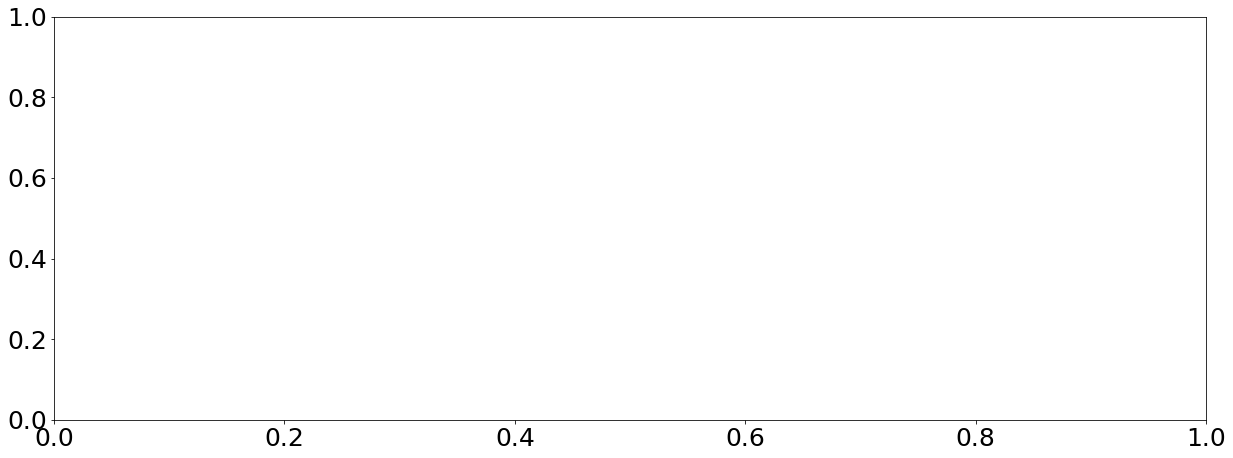

In [14]:

# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)
lb=0
ub=len(dtlist)+1
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (axs)= plt.subplots(1,1,figsize=(20,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# ax.set_title("Distribution of values of g",fontsize=font_size)
# ax2.set_title("Second moment",fontsize=font_size)
# ax3.set_title("Third moment",fontsize=font_size)
# ax4.set_title("Fourth moment",fontsize=font_size)

## no adaptive 
###############
lab="Overdamped"
g_all=[]
j=0
for i in range(int(len(dtlist)/2)):
    file_i="data_a25/vec_gi="+str(i*2)+".txt"
    g_vals_i=np.hstack(openCfile(file_i))


    for i in g_vals_i:
        g_all.append(i)
 
np.mean(g_all)

np.min(g_all)
# np.max(g_all)

## Plot accuracy for the slides for Berlin


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


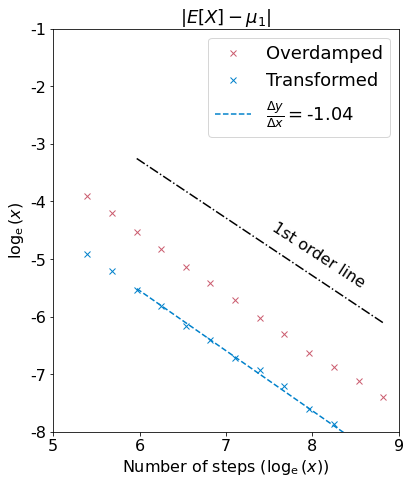

In [12]:
from settings_and_potential_eddie import *
font_size=20
# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)[1:-1]
nsteps=np.log(np.round(100/np.exp(xm),0))

lb=1
ub=-3 #len(dtlist)+1
x = np.log(np.round(100/dtlist[lb:ub],0))
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1)= plt.subplots(1,1,figsize=(6,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)



## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile("data_easy/noada_moment1.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)


#Plot moments
ax1.plot(nsteps,np.log(mom1_list)[1:-1],"x",color=myred,label=lab)



## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile("data_easy/tr_moment1.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)


ax1.plot(nsteps,np.log(mom1_list)[1:-1],"x",color=myblue,label=lab)

## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
ax1.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax1.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)
# 1st order line 

## Add the first order line 
ax1.plot(x, -1*x + c+2.,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
ax1.text(7.5,-5.5,"1st order line",color="black",rotation=-33,fontsize=font_size*0.8)

ax1.set_ylim([-8,-1]) #change to -7.5 for a=2.5
ax1.set_xlim([5,9])

#label of y axis 
ax1.set_title("$|E[X]-\\mu_1|$",fontsize=font_size*0.9)


# label of y axis
ax1.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)


# label of x axis
ax1.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)

# Label of x axis 
x=[5,6,7,8,9]
labels = ['5', '6', '7', '8', '9']
ax1.set_xticks(x, labels,fontsize=font_size*0.8)

#label of y axis 
# Label of x axis 
y=[-1,-2,-3,-4,-5,-6,-7,-8] #take away -8 for a=2.5
labels = ["-1","-2","-3","-4","-5","-6","-7","-8"] #take away -8 for a=2.5
ax1.set_yticks(y, labels,fontsize=font_size*0.8)


ax1.legend(fontsize=font_size*0.9,ncol=1,loc="upper right" ,bbox_to_anchor=(1., 1.))

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations")
fig.savefig("figures/moments_logplot_easy_slides.eps",dpi=1000)
fig.savefig("figures/moments_logplot_easy_slides.pdf")



In [ ]:
np.log(mom1_list)[1:-1]

array([-7.39354127, -7.12341662, -6.88291352, -6.63373294, -6.30761338,
       -6.03078883, -5.72005858, -5.41768576, -5.13893927, -4.83403619,
       -4.53424333, -4.20004886, -3.89993792])

In [ ]:
nsteps

array([8.11162808, 7.60090246, 7.26473018, 7.01301579, 6.90775528,
       6.2146081 , 5.80814249])